In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"gapton76","key":"2e4d19178578b29fcdba3efdb423eddd"}' >~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as se
%matplotlib inline

In [0]:
train=pd.read_csv('train_values.csv')
labels=pd.read_csv('train_labels.csv')
test=pd.read_csv('test_values.csv')
labels.head()

,row_id,accepted
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1


In [0]:
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


In [0]:
train.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,2.036228,4.786586,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,0.511351,1.024927,0.677685,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,2.000000,5.000000,1.000000,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,2.000000,5.000000,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,2.000000,5.000000,2.000000,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,4.000000,7.000000,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000


In [0]:
labels.accepted.describe()

count    500000.000000
mean          0.500228
std           0.500000
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: accepted, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0c296c9e8>]],
      dtype=object)

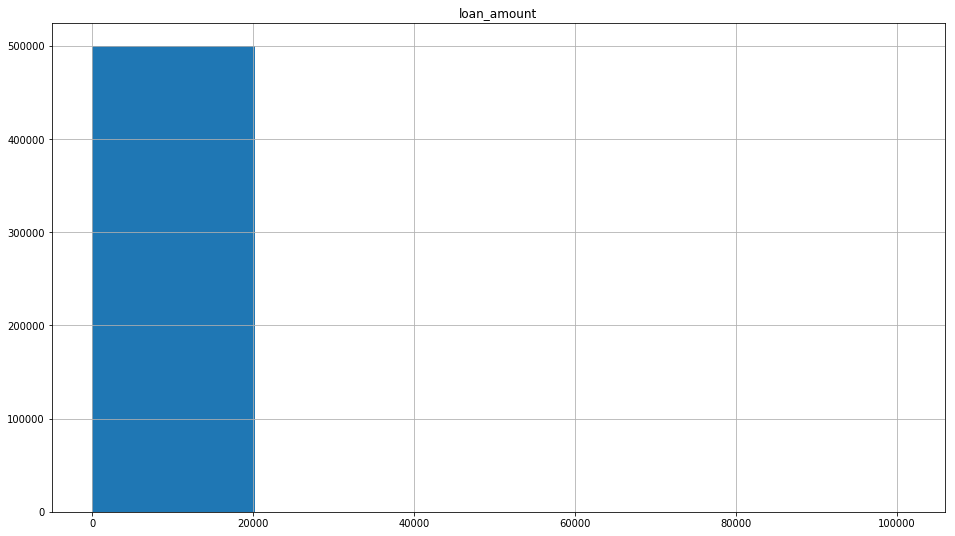

In [0]:
train.hist(column='loan_amount', bins=5)

(array([172., 220., 213., 143.,  97.,  49.,  35.,  24.,  11.,  10.,   5.,
          5.,   3.,   1.,   2.,   2.,   1.,   2.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 6.66200e+01, 1.32240e+02, 1.97860e+02, 2.63480e+02,
        3.29100e+02, 3.94720e+02, 4.60340e+02, 5.25960e+02, 5.91580e+02,
        6.57200e+02, 7.22820e+02, 7.88440e+02, 8.54060e+02, 9.19680e+02,
        9.85300e+02, 1.05092e+03, 1.11654e+03, 1.18216e+03, 1.24778e+03,
        1.31340e+03, 1.37902e+03, 1.44464e+03, 1.51026e+03, 1.57588e+03,
        1.64150e+03, 1.70712e+03, 1.77274e+03, 1.83836e+03, 1.90398e+03,
        1.96960e+03, 2.03522e+03, 2.10084e+03, 2.16646e+03, 2.23208e+03,
        2.29770e+03, 2.36332e+03, 2.42894e+03, 2.49456e+03, 2.56018e+03,
        2.62580e+03, 2.69142e+03, 2.75704e+03, 2.82266e+03, 2.88828e+03,
 

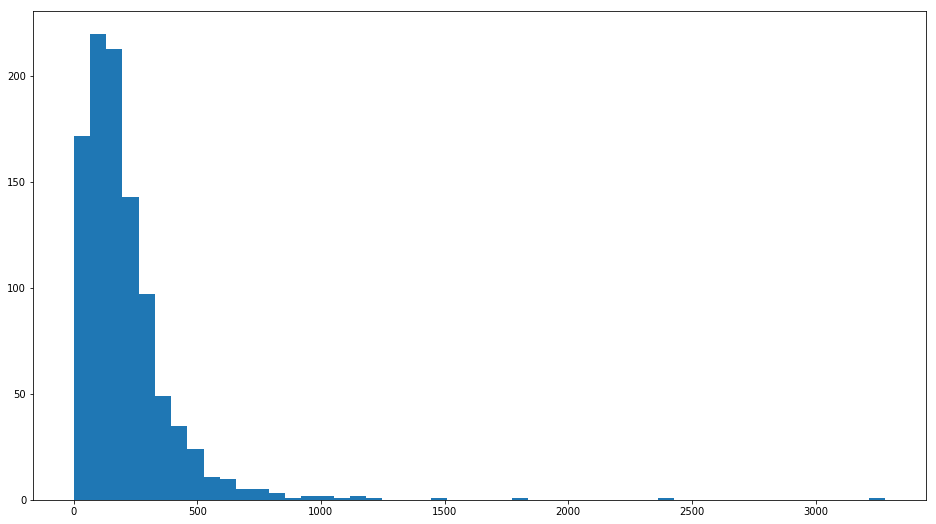

In [0]:
x = train.loan_amount[:1000]
plt.hist(x, bins=50)

In [0]:
bool_data = train.select_dtypes(include=['bool']).copy()
new_data_lc = bool_data.copy()
new_data_lc['co_applicant'] = new_data_lc['co_applicant'].astype('category')
new_data_lc['co_applicant'] = new_data_lc['co_applicant'].cat.codes
#replace_map = {'co_applicant': {False: 0, True:1}}
#All.replace(replace_map, inplace=True)
#All.head()
new_data_lc.head()

,co_applicant
0,0
1,0
2,0
3,1
4,0


In [0]:
new_All=train.drop(['co_applicant'], axis=1)
All=pd.concat([new_All,new_data_lc,labels.accepted],axis=1)
All.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,0,1
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,0,1
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,1,1
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,0,1


In [0]:
All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 23 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 no

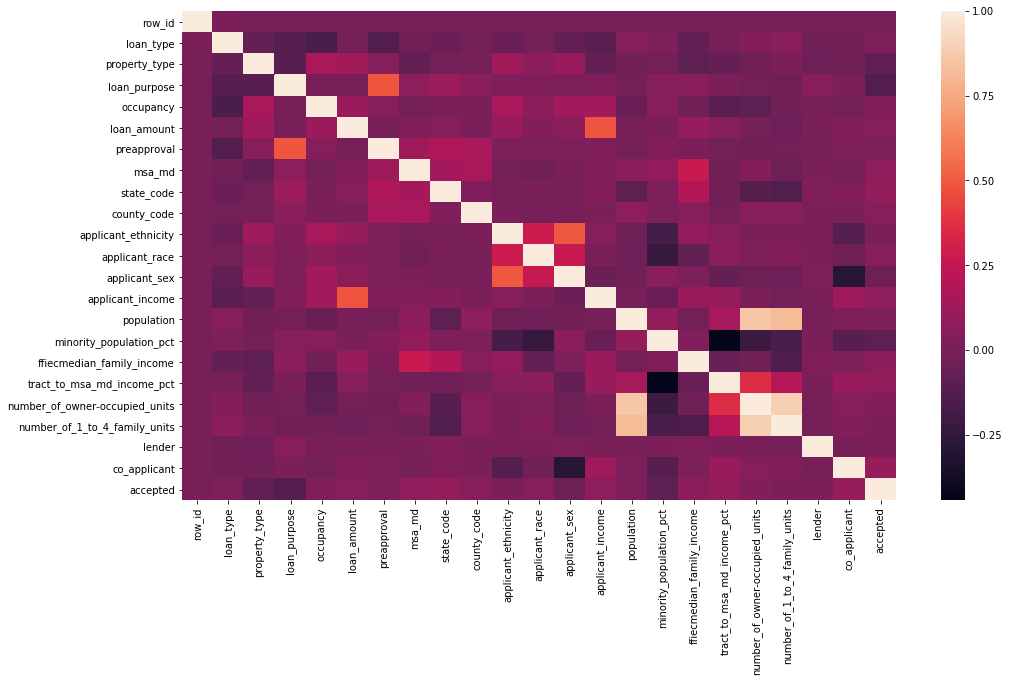

In [0]:
plt.rcParams["figure.figsize"] = [16,9]
se.heatmap(All.corr())

In [0]:
#scatter_matrix(All.iloc[:,1:20], c='y', figsize=(15,15), s=150, marker='D')
#plt.show()

<Figure size 1152x648 with 0 Axes>

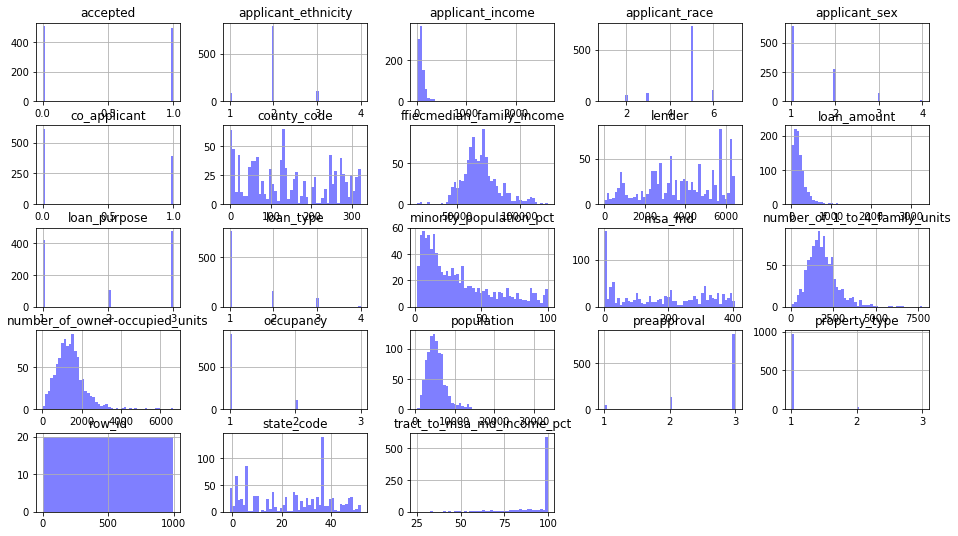

In [0]:
plt.figure()
All[:1000].hist(color='b', alpha=0.5, bins=50)
plt.figsize=(20,20)

#Feature selection

In [0]:
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split


In [0]:
print(All.columns)
Unused=['tract_to_msa_md_income_pct','number_of_owner-occupied_units','msa_md','county_code','applicant_race','minority_population_pct','accepted']
feats=['loan_type','number_of_1_to_4_family_units',
       'property_type', 'loan_purpose', 'occupancy','lender','co_applicant',
       'loan_amount', 'preapproval', 'state_code','applicant_ethnicity','applicant_sex','applicant_income','population','ffiecmedian_family_income']
#list = ['url','shares']
X = All.drop(Unused, axis = 1)
#x = x[feats]
X.columns
y = labels.loc[:,'accepted']

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted'],
      dtype='object')


In [0]:
print(All.columns)

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted'],
      dtype='object')


In [0]:
scatter_matrix(X, c='y', figsize=(15,15), s=150, marker='D')

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

#Learners

In [0]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [0]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)
LinPred = LinReg.predict(X_test)


print('linearregression ', sqrt(mean_squared_error(LinPred,y_test)))

plt.scatter(y_test, LinPred)
print ('Score:', LinReg.score(X_test, y_test))


ValueError: ignored

In [0]:
# Plot feature importance
feature_importance = model2.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [0]:

models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', ElasticNet()))
models.append(('knn', KNeighborsRegressor()))
models.append(('treeregre', DecisionTreeRegressor())) 
models.append(('xgboost', XGBRegressor()))


results = []
names = []
scoring = 'r2'
X.head()
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print('--------------------')
  print(msg)
  
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show() 

In [0]:
new=All.groupby('applicant_ethnicity')['accepted'].mean().reset_index().rename(
    columns={'applicant_ethnicity':'applicant_ethnicity','accepted' : 'MeanAccepted'})
new

,applicant_ethnicity,MeanAccepted
0,1,0.427413
1,2,0.520519
2,3,0.398740
3,4,0.789311


In [0]:
new_2=All.groupby('applicant_sex')['accepted'].mean().reset_index().rename(
    columns={'applicant_sex':'applicant_sex','accepted' : 'MeanAccepted'})
new_2

,applicant_sex,MeanAccepted
0,1,0.520823
1,2,0.466453
2,3,0.406054
3,4,0.795947


In [0]:
new_3=All[All.state_code == 45]
new_4=new_3.groupby('applicant_income')['loan_amount'].mean().reset_index().rename(
    columns={'applicant_income':'applicant_income','loan_amount' : 'Meanloan'})
new_4.head()


,applicant_income,Meanloan
0,1.0,151.000000
1,3.0,68.000000
2,6.0,171.333333
3,7.0,191.000000
4,8.0,151.500000


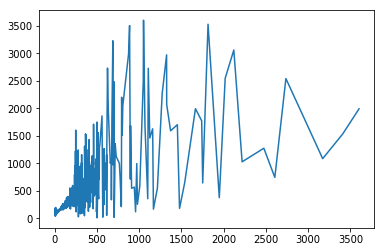

In [0]:
plt.plot(new_4.applicant_income,new_4.Meanloan)

In [0]:
new_5=All[All.state_code == 48]
new_6=new_5.groupby('county_code')['accepted'].mean().reset_index().rename(
    columns={'county_code':'county_code','accepted' : 'MeanAccepted'})
new_6.head()

,county_code,MeanAccepted
0,-1,0.120000
1,2,0.455882
2,3,0.513158
3,10,0.643836
4,11,0.390244


In [0]:
new_7=new_6.drop(0)
new_7.describe()

,county_code,MeanAccepted
count,62.000000,62.000000
mean,147.532258,0.484313
std,99.151766,0.081571
min,2.000000,0.315068
25%,59.500000,0.439851
50%,130.500000,0.477226
75%,242.750000,0.545330
max,321.000000,0.666667


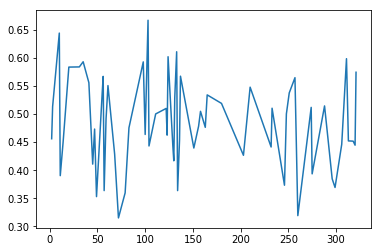

In [0]:
plt.plot(new_7.county_code,new_7.MeanAccepted)

In [0]:
new_8=All[All.state_code == 2]
new_8.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,accepted,co_applicant
14,14,1,1,1,2,151.0,3,281,2,210,2,5,1,172.0,2165.0,3.916,63560.0,100.000,839.0,1263.0,5473,0,1
20,20,1,1,3,1,111.0,3,278,2,208,1,5,2,41.0,6059.0,96.448,50655.0,72.441,1325.0,1551.0,5726,0,1
52,52,1,1,1,1,88.0,2,80,2,134,2,5,2,50.0,3023.0,27.691,66520.0,100.000,1106.0,1251.0,4750,1,0
60,60,1,1,3,1,185.0,3,311,2,68,3,5,1,43.0,4139.0,8.278,62864.0,100.000,1280.0,1537.0,4988,0,0
61,61,3,1,3,1,212.0,3,105,2,321,2,5,1,86.0,5634.0,19.654,60040.0,100.000,1636.0,2494.0,3791,1,1


In [0]:
new_9=new_8.groupby('loan_type')['accepted'].mean().reset_index().rename(
    columns={'loan_type':'loan_type','accepted' : 'MeanAccepted'})
new_9

,loan_type,MeanAccepted
0,1,0.435804
1,2,0.503708
2,3,0.531802
3,4,0.461240


In [0]:
new_10=All[All.state_code == 4]
new_11=new_10.groupby('loan_type')['accepted'].mean().reset_index().rename(
    columns={'loan_type':'loan_type','accepted' : 'MeanAccepted'})
new_11

,loan_type,MeanAccepted
0,1,0.569992
1,2,0.554178
2,3,0.639456
3,4,0.617647
